<a href="https://colab.research.google.com/github/Savvy-Slowley/Negro-League-Players-Clustering/blob/main/Negro_League_Players_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Import

In [1]:
#Basics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##Pre-Processing##
# Import label encoder 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# For scaling data
from sklearn.preprocessing import StandardScaler

#CLUSTERING METRICS#
#Import Silhouette Coefficient
from sklearn.metrics import silhouette_score

#CLUSTERING#
#Importing KMeans, Agglomerative
from sklearn.cluster import KMeans, AgglomerativeClustering

# Generating The Data

In [2]:
df = pd.read_csv('/content/negro-leagues-player-ratings.csv')
df.head()

,playerID,commonName,league,hof,startYear,endYear,totalGames,positionWar,averageHit,patience,power,speed,defense,gameCutoff,playerLabel,shortWar,positionCat,position,careerStarts,strikeOuts,control,fip,whip,era,fact
0,culbech01,Charlie Culberson,MLB,0,2012,2020,428,-0.620,41.791451,13.776205,41.709774,64.524912,24.258100,300,Active Player,-0.234673,Outfielder,Batter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gosseph01,Phil Gosselin,MLB,0,2013,2020,359,0.895,72.992105,28.641438,16.879935,58.562483,44.895181,300,Active Player,0.403872,Middle IF,Batter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,herrmch01,Chris Herrmann,MLB,0,2012,2019,370,-1.150,3.648244,70.106180,44.105636,75.850803,36.482439,300,Active Player,-0.503514,Catcher,Batter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,kratzer01,Erik Kratz,MLB,0,2010,2020,335,1.715,21.236047,19.112442,69.670569,1.334059,99.591614,300,Active Player,0.829343,Catcher,Batter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pireljo01,Jose Pirela,MLB,0,2014,2019,302,0.545,67.574190,18.976314,37.244759,78.872856,38.959978,300,Active Player,0.292351,Middle IF,Batter,NaN,NaN,NaN,NaN,NaN,NaN,NaN



# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      1117 non-null   object 
 1   commonName    1117 non-null   object 
 2   league        1117 non-null   object 
 3   hof           1117 non-null   int64  
 4   startYear     1117 non-null   int64  
 5   endYear       1117 non-null   int64  
 6   totalGames    1117 non-null   int64  
 7   positionWar   1117 non-null   float64
 8   averageHit    735 non-null    float64
 9   patience      735 non-null    float64
 10  power         735 non-null    float64
 11  speed         735 non-null    float64
 12  defense       735 non-null    float64
 13  gameCutoff    1117 non-null   int64  
 14  playerLabel   1117 non-null   object 
 15  shortWar      1117 non-null   float64
 16  positionCat   1117 non-null   object 
 17  position      1117 non-null   object 
 18  careerStarts  382 non-null  

In [4]:
df.drop(columns=['careerStarts','strikeOuts','control','fip','whip','era','fact','commonName', 'playerID'],inplace=True)
df.head()

,league,hof,startYear,endYear,totalGames,positionWar,averageHit,patience,power,speed,defense,gameCutoff,playerLabel,shortWar,positionCat,position
0,MLB,0,2012,2020,428,-0.620,41.791451,13.776205,41.709774,64.524912,24.258100,300,Active Player,-0.234673,Outfielder,Batter
1,MLB,0,2013,2020,359,0.895,72.992105,28.641438,16.879935,58.562483,44.895181,300,Active Player,0.403872,Middle IF,Batter
2,MLB,0,2012,2019,370,-1.150,3.648244,70.106180,44.105636,75.850803,36.482439,300,Active Player,-0.503514,Catcher,Batter
3,MLB,0,2010,2020,335,1.715,21.236047,19.112442,69.670569,1.334059,99.591614,300,Active Player,0.829343,Catcher,Batter
4,MLB,0,2014,2019,302,0.545,67.574190,18.976314,37.244759,78.872856,38.959978,300,Active Player,0.292351,Middle IF,Batter


In [5]:
df.duplicated().any()

False

In [6]:
df.isnull().sum()

league           0
hof              0
startYear        0
endYear          0
totalGames       0
positionWar      0
averageHit     382
patience       382
power          382
speed          382
defense        382
gameCutoff       0
playerLabel      0
shortWar         0
positionCat      0
position         0
dtype: int64

In [7]:
df['averageHit'].value_counts()

100.000000    2
99.680284     1
76.838366     1
93.520283     1
21.236047     1
             ..
48.640483     1
11.047957     1
79.076377     1
74.320242     1
85.222025     1
Name: averageHit, Length: 734, dtype: int64

In [8]:
df['patience'].value_counts()

4.531722      1
97.280967     1
7.854985      1
23.481350     1
15.709970     1
             ..
74.320242     1
79.758308     1
33.605684     1
87.915408     1
100.000000    1
Name: patience, Length: 735, dtype: int64

In [9]:
df['speed'].value_counts()

100.000000    2
24.191829     1
99.319357     1
14.102913     1
25.679758     1
             ..
44.191829     1
12.496597     1
74.320242     1
79.758308     1
26.708413     1
Name: speed, Length: 734, dtype: int64

In [10]:
df['defense'].value_counts()

4.531722      1
60.106572     1
58.610272     1
50.151057     1
8.063943      1
             ..
47.886323     1
80.106572     1
17.220544     1
68.277946     1
100.000000    1
Name: defense, Length: 735, dtype: int64

In [11]:
df.fillna(df.mean(), inplace=True)


# Exploratory Data Analysis (EDA)

In [12]:
df.describe()

,hof,startYear,endYear,totalGames,positionWar,averageHit,patience,power,speed,defense,gameCutoff,shortWar
count,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000
mean,0.222919,1962.048344,1972.785139,702.584602,21.246186,62.347266,53.840137,59.665994,56.169871,54.919225,292.175470,2.826067
std,0.416391,41.221899,40.292417,709.562910,26.669657,23.646903,23.062153,23.397812,22.997050,23.975995,170.378594,2.117518
min,0.000000,1901.000000,1903.000000,36.000000,-5.400000,0.871222,0.426288,0.735094,0.710480,0.000000,60.000000,-4.793443
25%,0.000000,1924.000000,1935.000000,214.000000,3.655000,54.078550,41.953819,51.900533,46.749556,44.895181,150.000000,1.345126
50%,0.000000,1940.000000,1948.000000,431.000000,10.290000,62.347266,53.840137,59.665994,56.169871,54.919225,300.000000,2.646535
75%,0.000000,2010.000000,2020.000000,875.000000,29.100000,80.106572,66.998224,74.924471,69.343861,67.531083,500.000000,4.257791
max,1.000000,2018.000000,2020.000000,3308.000000,160.705000,100.000000,100.000000,100.000000,100.000000,100.000000,500.000000,11.140013


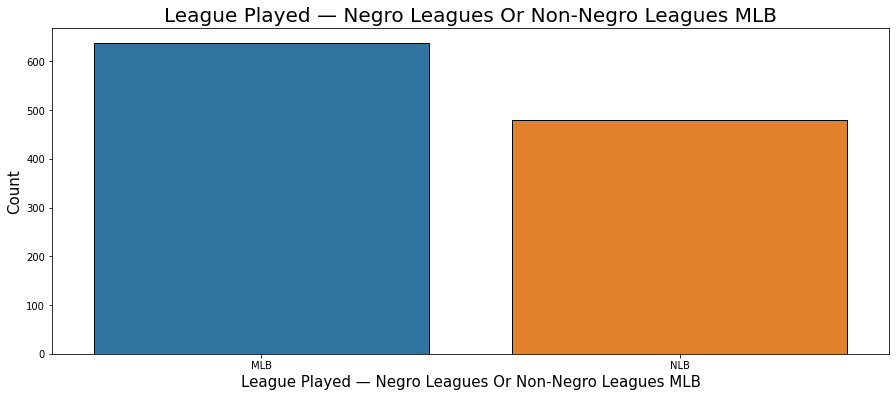

In [13]:
plt.figure(figsize=(15,6));
sns.countplot(data=df,x='league', edgecolor='k');
plt.title('League Played — Negro Leagues Or Non-Negro Leagues MLB',fontsize=20);
plt.ylabel('Count', fontsize=15);
plt.xlabel('League Played — Negro Leagues Or Non-Negro Leagues MLB', fontsize=15);

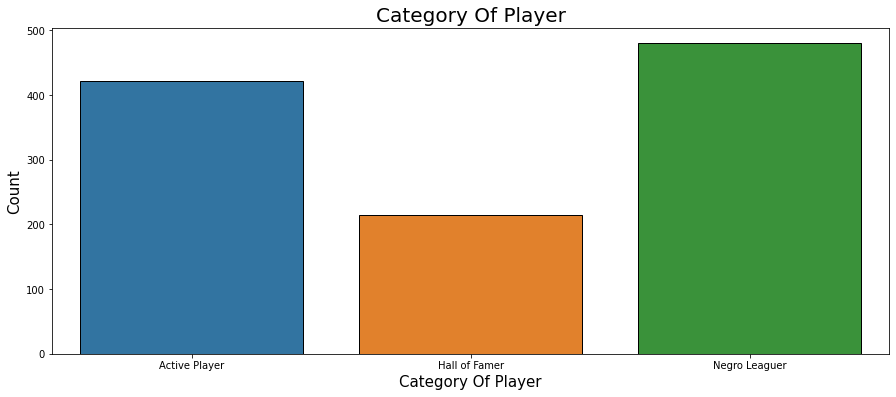

In [14]:
plt.figure(figsize=(15,6));
sns.countplot(data=df,x='playerLabel', edgecolor='k');
plt.title('Category Of Player',fontsize=20);
plt.ylabel('Count', fontsize=15);
plt.xlabel('Category Of Player', fontsize=15);

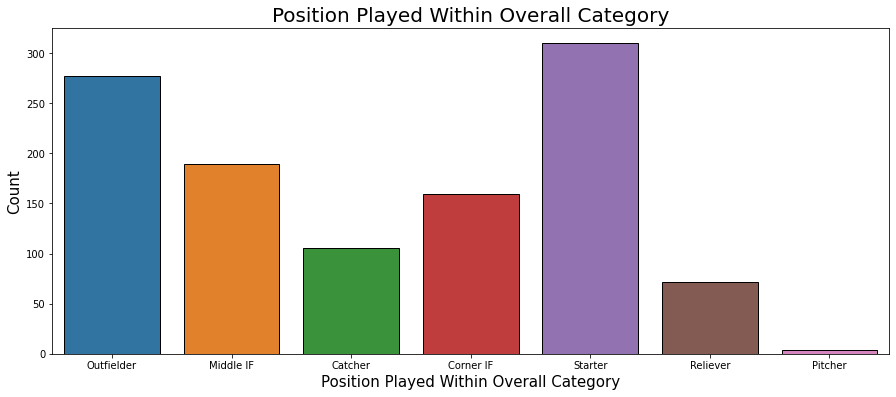

In [15]:
plt.figure(figsize=(15,6));
sns.countplot(data=df,x='positionCat', edgecolor='k');
plt.title('Position Played Within Overall Category',fontsize=20);
plt.ylabel('Count', fontsize=15);
plt.xlabel('Position Played Within Overall Category', fontsize=15);

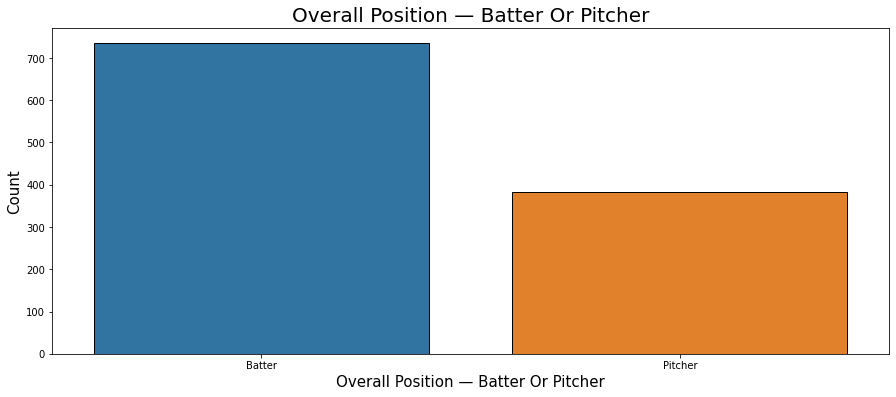

In [16]:
plt.figure(figsize=(15,6));
sns.countplot(data=df,x='position', edgecolor='k');
plt.title('Overall Position — Batter Or Pitcher',fontsize=20);
plt.ylabel('Count', fontsize=15);
plt.xlabel('Overall Position — Batter Or Pitcher', fontsize=15);

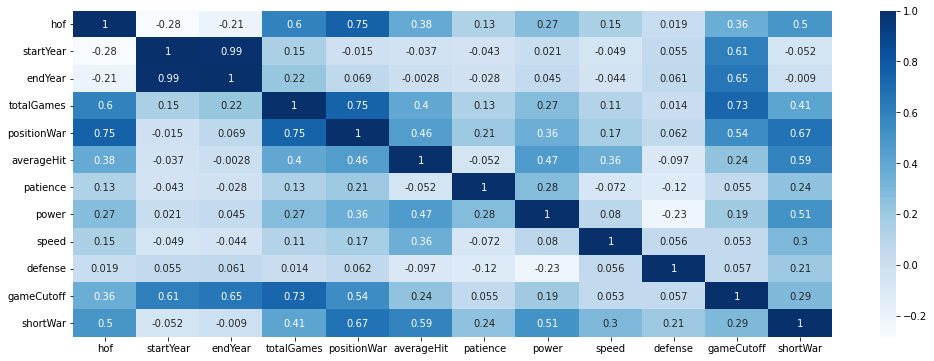

In [17]:
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(), annot = True, cmap='Blues');

# Data Pre-Processing

In [18]:
df.select_dtypes(include='object').columns

Index(['league', 'playerLabel', 'positionCat', 'position'], dtype='object')

In [19]:
objects = ['league', 'playerLabel', 'positionCat', 'position']

In [20]:
# Instantiate Label Encoder
le = LabelEncoder()
# Fit and transform categorical data
df[objects] = df[objects].apply(le.fit_transform)
df.head()

,league,hof,startYear,endYear,totalGames,positionWar,averageHit,patience,power,speed,defense,gameCutoff,playerLabel,shortWar,positionCat,position
0,0,0,2012,2020,428,-0.620,41.791451,13.776205,41.709774,64.524912,24.258100,300,0,-0.234673,3,0
1,0,0,2013,2020,359,0.895,72.992105,28.641438,16.879935,58.562483,44.895181,300,0,0.403872,2,0
2,0,0,2012,2019,370,-1.150,3.648244,70.106180,44.105636,75.850803,36.482439,300,0,-0.503514,0,0
3,0,0,2010,2020,335,1.715,21.236047,19.112442,69.670569,1.334059,99.591614,300,0,0.829343,0,0
4,0,0,2014,2019,302,0.545,67.574190,18.976314,37.244759,78.872856,38.959978,300,0,0.292351,2,0


In [21]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

# Clustering Techniques

## KMeans

### Determining The Number Of Clusters

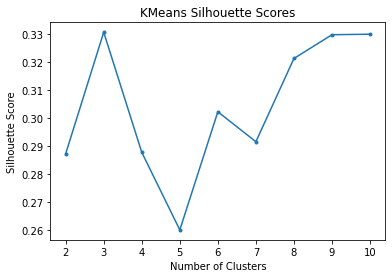

In [22]:
# Visualize different KMeans silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores_KMeans = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores_KMeans.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores_KMeans, marker = '.');
plt.xlabel('Number of Clusters');
plt.ylabel('Silhouette Score');
plt.title('KMeans Silhouette Scores');

In [23]:
# Fit kmeans model with 3 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_df)
print('KMeans Silhouette Score:',silhouette_score(scaled_df, kmeans.labels_))

KMeans Silhouette Score: 0.3306744160931442


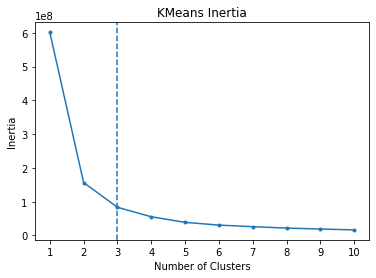

In [24]:
ks = range(1, 11)  
inertias = []		

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, marker = '.');
plt.axvline(x=3, ls='--')
plt.xlabel('Number of Clusters');
plt.ylabel('Inertia');
plt.title('KMeans Inertia');
plt.xticks(ks);

### Plotting Clusters

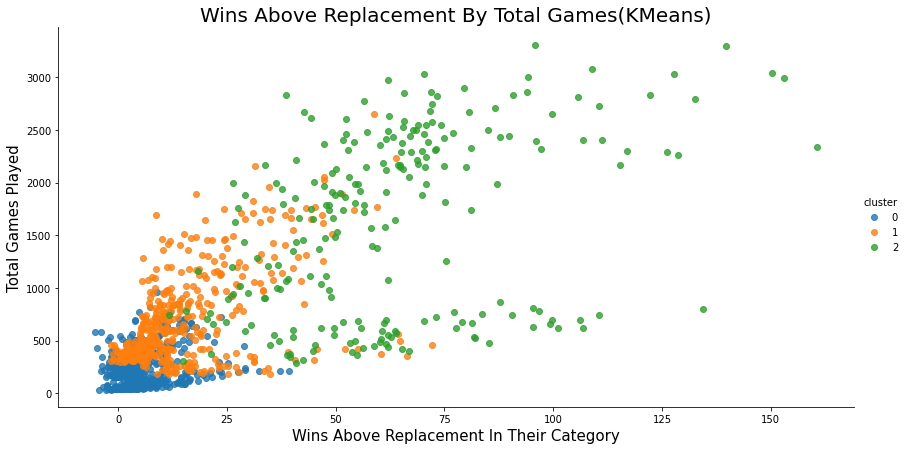

In [25]:
# Instantiate KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_df)
# Save the cluster lables to the dataframe 
df['cluster'] = kmeans.labels_
# Visualize data
sns.lmplot(x='positionWar',y='totalGames',hue = 'cluster', data=df, fit_reg=False,palette='tab10',height=6, aspect=2)
plt.xlabel('Wins Above Replacement In Their Category', fontsize=15);
plt.ylabel('Total Games Played', fontsize=15);
plt.title('Wins Above Replacement By Total Games(KMeans)', fontsize=20);

### Statistical Details

In [26]:
print('Wins Above Replacement In Their Category')
df.groupby('cluster')['positionWar'].describe()

Wins Above Replacement In Their Category


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,468.0,5.471795,6.654500,-5.400,1.0000,3.650,8.60000,39.300
1,420.0,15.929464,13.412965,-1.575,6.8325,11.575,21.28625,72.100
2,229.0,63.235000,26.954354,11.700,45.0600,60.985,74.85500,160.705


In [27]:
print('Total Games Played')
df.groupby('cluster')['totalGames'].describe()

Total Games Played


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,468.0,237.457265,183.196435,36.0,88.75,184.0,327.50,957.0
1,420.0,717.178571,450.761767,182.0,373.00,571.0,958.75,2653.0
2,229.0,1626.384279,848.908133,286.0,723.00,1783.0,2367.00,3308.0


## Agglomerative Clustering

### Determining The Number Of Clusters

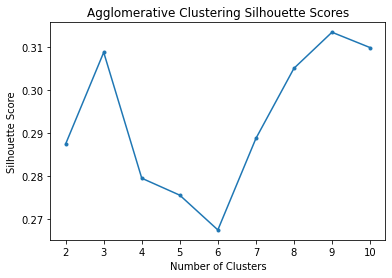

In [28]:
# Visualize different Agglomerative Clustering silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  hc = AgglomerativeClustering(n_clusters = i)
  hc.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, hc.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');
plt.title('Agglomerative Clustering Silhouette Scores');

In [29]:
# See Hierarchical clustering silhouette score
hc = AgglomerativeClustering(n_clusters = 3)
hc.fit(scaled_df)
print('Agglomerative Clustering Silhouette Score:', silhouette_score(scaled_df, hc.labels_))

Agglomerative Clustering Silhouette Score: 0.308690300118153


### Plotting Clusters

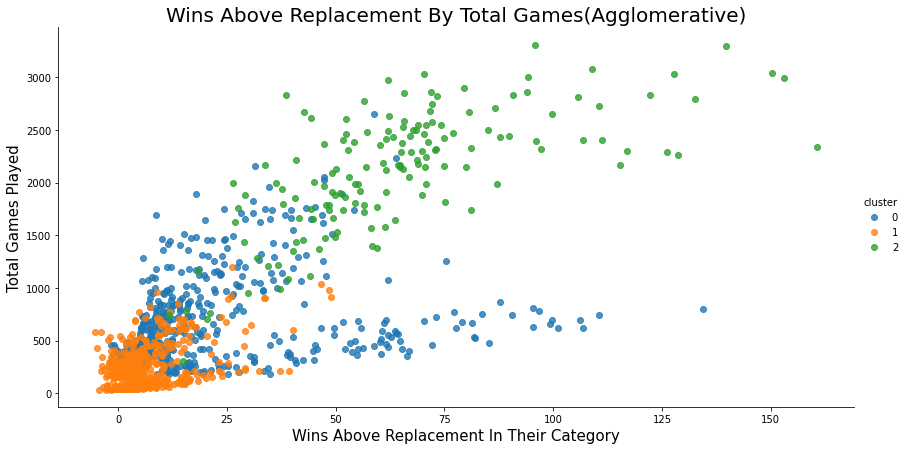

In [30]:
# Instantiate clustering
hc = AgglomerativeClustering(n_clusters = 3)
hc.fit(scaled_df)
# Save the cluster lables to the dataframe 
df['cluster'] = hc.labels_
# Visualize the clusters
sns.lmplot(x='positionWar',y='totalGames',hue = 'cluster', data=df, fit_reg=False,palette='tab10',height=6, aspect=2)
plt.xlabel('Wins Above Replacement In Their Category', fontsize=15);
plt.ylabel('Total Games Played', fontsize=15);
plt.title('Wins Above Replacement By Total Games(Agglomerative)', fontsize=20);

### Statistical Details

In [31]:
print('Wins Above Replacement In Their Category')
df.groupby('cluster')['positionWar'].describe()

Wins Above Replacement In Their Category


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,485.0,22.418691,22.411626,-1.575,7.47500,13.9650,30.97000,134.440
1,480.0,6.186250,8.081755,-5.400,1.00000,3.8500,9.02500,48.900
2,152.0,65.062664,27.958614,11.700,47.80625,61.8275,73.60375,160.705


In [32]:
print('Wins Above Replacement In Their Category')
df.groupby('cluster')['positionWar'].describe()

Wins Above Replacement In Their Category


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,485.0,22.418691,22.411626,-1.575,7.47500,13.9650,30.97000,134.440
1,480.0,6.186250,8.081755,-5.400,1.00000,3.8500,9.02500,48.900
2,152.0,65.062664,27.958614,11.700,47.80625,61.8275,73.60375,160.705


# Results

The results between K-means and agglomerative clustering were pretty similar but K-means had better results.